<a href="https://colab.research.google.com/github/MAHESWARI-ROUT/Task-1_CodeAlpha/blob/main/Diseases_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('/content/Training.csv')
test=pd.read_csv('/content/Testing.csv')

In [ ]:
train.shape


(4920, 134)

In [ ]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
test.shape



(42, 133)

In [ ]:
train.drop('Unnamed: 133',axis=1,inplace=True)


In [ ]:
train.shape


(4920, 133)

In [ ]:
test.shape

(42, 133)

In [ ]:
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
test.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
A =train.drop('prognosis',axis=1)
B =train['prognosis']
C =test.drop('prognosis',axis=1)
D =test['prognosis']

<Axes: ylabel='prognosis'>

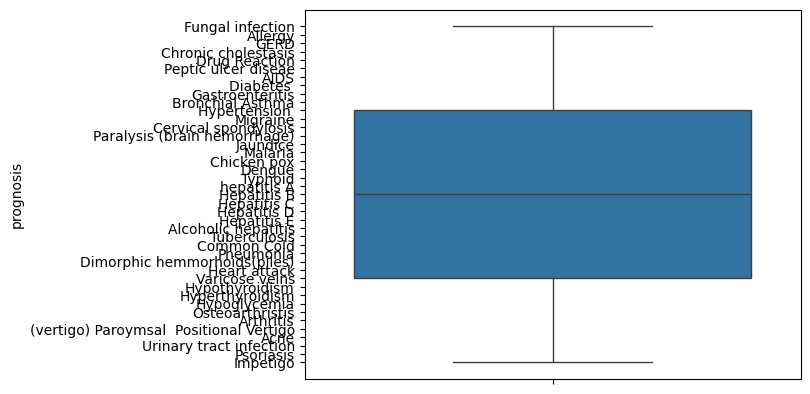

In [ ]:
sns.boxplot(train['prognosis'])


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(A,B,test_size=0.2,random_state=32)

In [ ]:
RF=RandomForestClassifier()
DT=DecisionTreeClassifier()

In [ ]:
model1=RF.fit(x_train,y_train)
model2=DT.fit(x_train,y_train)

In [ ]:
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)

In [ ]:
print(accuracy_score(y_test,pred1))                # accuracy of the algorithm using default value


1.0


In [ ]:
print(accuracy_score(y_test,pred2))

1.0


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
report = classification_report(y_test, pred1, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,33.0
AIDS,1.0,1.0,1.0,24.0
Acne,1.0,1.0,1.0,30.0
Alcoholic hepatitis,1.0,1.0,1.0,16.0
Allergy,1.0,1.0,1.0,33.0
Arthritis,1.0,1.0,1.0,18.0
Bronchial Asthma,1.0,1.0,1.0,25.0
Cervical spondylosis,1.0,1.0,1.0,28.0
Chicken pox,1.0,1.0,1.0,23.0
Chronic cholestasis,1.0,1.0,1.0,21.0


In [ ]:
CM = confusion_matrix(y_test, pred1)
pd.DataFrame(CM)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,28,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,23,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
prediction=pd.DataFrame(model1.predict(C), columns=["Predicted_data"])

In [ ]:
tests=test.join(prediction)[["prognosis","Predicted_data"]]

In [ ]:
tests['output']=tests.apply(lambda x:'correct' if x['prognosis']==x['Predicted_data'] else 'incorrect',axis=1)

In [ ]:
tests

,prognosis,Predicted_data,output
0,Fungal infection,Fungal infection,correct
1,Allergy,Allergy,correct
2,GERD,GERD,correct
3,Chronic cholestasis,Chronic cholestasis,correct
4,Drug Reaction,Drug Reaction,correct
5,Peptic ulcer diseae,Peptic ulcer diseae,correct
6,AIDS,AIDS,correct
7,Diabetes,Diabetes,correct
8,Gastroenteritis,Gastroenteritis,correct
9,Bronchial Asthma,Bronchial Asthma,correct
